# <div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: CNN Modeling </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Name: Ali Razi**

**Contact: ali.razi9292@gmail.com**

**Date: 08-09-2023**

---

**Main Objective** Using machine learning estimate size of tumors in breast cancer patients to provide the practitioners and patients better vision of their cancers stages.

In this notebook it is aimed to focus on modeling stage and evaluate those models for porposed project.In the previous notebook, it was thoroughly explored and preprocessed the data, and now it will be utilized the resulting of three different dataframes: 'data_train_eda_dir', 'data_val_eda_dir','data_test_eda_dir' to build various models.Throughout this notebook, it will be applied the hyperparameters optimization and it will be evaluated the models performance using different metrics. Finally, it will be described the conclusions of the project.

# Notebook Content 

**Section 1: Load the Data and Libraries**

Import the necessary libraries and frameworks (e.g., TensorFlow, Keras).
Load the breast cancer dataset.
Explore the dataset's structure and characteristics.

**Section 2: Data Preprocessing and Data Generators Setup**

Preprocess the dataset:
Handle missing data (if any).
Normalize or rescale image data.
Split the dataset into training, validation, and test sets.
Set up data generators for efficient data loading and augmentation.

**Section 3: Modeling**

Introduce the modeling approach (Convolutional Neural Networks) for image classification.
Explain the rationale for using CNNs for this task.

**Section 4: Convolutional Neural Networks (CNNs)**

Provide a brief overview of CNN architecture.
Explain key components like convolutional layers, pooling layers, and fully connected layers.
Mention the CNN architecture you plan to use for this project.

**Section 5: Data Path Definitions**

Define the file paths for accessing the dataset.

**Section 6: Data Augmentation with ImageDataGenerator**

Explain the importance of data augmentation for improving model generalization.
Use ImageDataGenerator to perform data augmentation.
Specify the augmentation techniques applied (e.g., rotation, zoom).


**Section 7: Defining the CNN Model**

Define the architecture of your CNN model.
Include the layers, activation functions, and any regularization techniques.

**Section 8: Train the CNN Model - First Try**

Train the initial version of the CNN model using the training data and validation data.
Monitor training progress and visualize metrics like loss and accuracy.

**Section 9: Enhancing CNN Model Architecture for Improved Image Classification**

Discuss the results of the first model training and identify areas for improvement.
Modify the CNN architecture to address shortcomings observed during initial training.
Explain the rationale behind architecture changes.

**Section 10: Confusion Matrix Visualization for Model Evaluation**

Create and visualize the confusion matrix to assess model performance.
Explain how to interpret the confusion matrix in the context of breast cancer classification.

**Section 11: Improved CNN Model for Binary Image Classification with Keras**

Present the enhanced CNN model with architecture changes.
Mention any hyperparameter adjustments.
Prepare the model for retraining.

**Section 12: Confusion Matrix Visualization for Model Evaluation**

Reevaluate the improved model using the confusion matrix.
Compare results to the initial model's performance.

**Section 13: Making Predictions**

Demonstrate how to use the trained model to make predictions on new data.
Provide examples of predicting benign and malignant cases.

**Section 14: Explainable LIME Image Explanation**

Introduce LIME (Local Interpretable Model-agnostic Explanations) for image classification.
Explain why interpretability is crucial in medical applications.
Describe the process of generating LIME explanations.

**Section 15: Explaining Image Classifications with Lime and Felzenszwalb Segmentation**

Integrate Felzenszwalb Segmentation with LIME to explain image predictions.
Explain how Felzenszwalb Segmentation enhances LIME explanations.

**Section 16: Visualizing Lime Explanation Mask**

Show visualizations of LIME explanation masks.
Interpret the visualizations by explaining the significance of warmer and cooler colors.

**Section 17: Conclusion**

Summarize the main findings of the project.
Highlight the model's performance in tumor size estimation and classification.
Discuss the utility of LIME explanations in the context of breast cancer diagnosis.
Offer insights into potential future improvements or directions for this work.

---

**Load the data and libraries** 

Before we start anything we imported libraries for **deep learning (Keras and PyTorch)**, **data handling (NumPy, Pandas)**, **data visualization (Matplotlib, Seaborn)**, and **custom modules for training and data processing**. These libraries collectively provide a robust environment for developing and training machine learning models and conducting data analysis.

In [2]:
import keras
from keras.models import Model
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Dropout, Cropping2D, Input, concatenate, Conv2DTranspose
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import torch
from torchvision import models
import torch.nn as nn
import train
import data
import pathlib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2023-09-02 11:10:35.867567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

In this project, we work with an **ultrasound breast classification dataset**. We have organized the data into **three key directories**:


In [3]:
# Load the data 
# Ultrasound Breast Classification Data Directories

#Training Data Directory(`data_train_eda_dir`):
path_train_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced"
data_train_eda_dir = pathlib.Path(path_train_eda)

#Validation Data Directory(`data_val_eda_dir`):
path_val_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/val/balanced"
data_val_eda_dir = pathlib.Path(path_val_eda)

#Test Data Directory(`data_test_eda_dir`):
path_test_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced"
data_test_eda_dir = pathlib.Path(path_test_eda)

> Properly organizing and specifying these directory paths is essential for efficient data access and seamless integration into our machine learning pipeline. These directories play a critical role in the development and evaluation of machine learning models for ultrasound breast classification.


# Data Preprocessing and Data Generators Setup

 In this section, we define the **dimensions and data generators** for our ultrasound breast classification project. These components play a crucial role in **preparing and augmenting** our dataset for training and evaluation. Additionally, we specify the **dimensions** of our image data and set the **batch size** for processing:



In [11]:
# Shape and Data Generators


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

#Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    data_train_eda_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(
    data_val_eda_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' 
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    data_test_eda_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

# Class labals
class_labels = train_generator.class_indices

print("Class Labels:", class_labels)


Found 41975 images belonging to 2 classes.
Found 4360 images belonging to 2 classes.
Found 40125 images belonging to 2 classes.
Class Labels: {'balanced_benign': 0, 'balanced_malignant': 1}


# Modeling 

In this case, the goal is to predict whether a tumor is benign or malignant based on features related to the tumor size. The binary classification task involves making one of two predictions: "benign" or "malignant."

There are several machine learning models that can be used to solve binary classification problems like estimating size of tumor for benign and malignant paitients; models such as:

-  Convolutional Neural Networks (CNNs)
-  Support Vector Machines (SVM)
-  Random Forest and Gradient Boosting


The selection of a suitable model is influenced by several considerations, including the dataset's size, problem intricacy, model interpretability, and the targeted accuracy level.

It is commonly advisable to experiment with multiple models, assessing their performance, in order to determine the most fitting choice for addressing the specific problem.

The dataframe in this project is contianed partially numores number of ultrasound images data, Based on this, to this case it will be explored the following models:

  -  Convolutional Neural Networks (CNNs): Using Convolutional Neural Networks (CNNs) as your primary choice for model architecture. CNNs are designed to handle image data efficiently, capturing spatial hierarchies and patterns that are essential in medical image analysis.
  
  - Support Vector Machines (SVM): SVMs can work well if you've performed feature extraction and reduced the dimensionality of your image data. They are particularly useful when you have limited data but well-defined features.
  
  - Random Forest and Gradient Boosting:Random Forest and Gradient Boosting algorithms can handle tabular data efficiently. If you've extracted relevant features from your ultrasound images and are treating this as a feature-based classification problem, these models could be used.

  # Convolutional Neural Networks (CNNs)
 
 Previous Assumptions:
 
 - Data Quality and Relevance ---> Accurate, Representative, and contains relevant features for tumor size estimation. Also, the labeling of tumor instances as benign or malignant is reliable and based on medical expertise.
 
 - Independence of Observations ---> Each image in the dataset is considered an independent observation, and there is no inherent temporal or spatial correlation.
 
 - Data Balance ---> The dataset contains a balanced representation of both benign and malignant tumor cases to avoid class imbalance issues.
 
 - Adequate Sample Size ---> The dataset is sufficiently large to capture the complexity of tumor size variations within benign and malignant cases.
 
 - Image Noise and Artifacts ---> The images are assumed to be relatively free of significant noise, artifacts, or inconsistencies that could adversely affect size estimation.
 
 - Generalization Potential ---> The learned features and patterns from the dataset can generalize to new, unseen breast cancer images for accurate tumor size estimation.
 
 - Model Complexity ---> The chosen CNN architecture is suitable for the complexity of the problem and is not overly complex, which could lead to overfitting.
 
 - Error Independence ---> The errors or residuals between the predicted tumor sizes and actual sizes are assumed to be independent, following a random distribution.

___
**Data Path Definitions**

In this section, we define the predictor and target variables for our ultrasound breast classification project. These variables represent the input images and their corresponding annotations, which are crucial for training and evaluating machine learning models.


In [4]:
# Predictor and Traget Variables 

x_train_eda_dir = os.path.join(data_train_eda_dir, 'train')
y_train_eda_dir = os.path.join(data_train_eda_dir, 'trainannot')

x_val_eda_dir = os.path.join(data_val_eda_dir, 'val')
y_val_eda_dir = os.path.join(data_val_eda_dir, 'valannot')

x_test_eda_dir = os.path.join(data_test_eda_dir, 'test')
y_test_eda_dir = os.path.join(data_test_eda_dir, 'testannot')

---
# Data Augmentation with ImageDataGenerator
In this section, we apply data augmentation techniques using the `ImageDataGenerator` from TensorFlow's Keras preprocessing library. Data augmentation is a critical step in enhancing the diversity and robustness of the training dataset, which can lead to improved model generalization.



- Let's break out some majore steps out here: 

    - There are some specifies various augmentation options to be applied to the training images here such as  Scales pixel to [0,1] ,  random rotation (-20 to 20), random horizontal and vertical shifting by 20% of the image width and image hight and also, having random hrozontal flipping.
    
    - Number of images that are about to be processed in each training batch is already detemined by 128.
    
    - In case of generating batches there are some other factors that should be mentioned such as: resizing to dimisions of (100,200), making sure that shuffing happens for data in each epoch, converts the images to grayscale(single channel).

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    rotation_range=20,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_dir = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced'
# validation_dir = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/val'

batch_size = 128  

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 200), 
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=True,
    color_mode='grayscale',
)

# # validation_generator = validation_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(256, 256), 
#     batch_size=batch_size,
#     class_mode='categorical', 
#     shuffle=False
# )

Found 41975 images belonging to 2 classes.


> The data generator has successfully found and processed a total of 41,975 images belonging to 2 classes.

> Here we configure the ImageDataGenerator for data augmentation. This includes rescaling pixel values, applying random rotations, shifting images horizontally and vertically, and enabling horizontal flips. These augmentations are applied to the training dataset, enhancing its diversity and improving the model's ability to handle variations in real-world data.

> The train_generator is set up to yield augmented images and their corresponding labels for training machine learning models. By leveraging data augmentation, we aim to train more robust and accurate models for ultrasound breast classification.

---

# Defining the CNN_model



The CNN model architecture is defined with convolutional layers, max-pooling layers, dropout layers for regularization, and fully connected layers. The network aims to learn meaningful features from input images and make predictions for two classes using the softmax activation function.



1. At first there are initializes a sequential model, which is a linear stack of layers.
2. Convolutional and Pooling Layers: Adds a convolutional layer with 16 filters and a (3, 3) kernel size. The activation function is ReLU.Also, adds a max-pooling layer with a (2, 2) pool size.And, adds a dropout layer to prevent overfitting by randomly setting a fraction (10%) of input units to 0 during training.
3. Second Convolutional and Pooling Layers (similar to the first set)

- Here we flattens the output of the previous layer into a one-dimensional vector.

- To sum up the proposed model, the structure of this CNN model consists of convolutional, pooling, dropout, flattening, dense, and output layers. The model is designed for binary classification with two classes.

In [34]:
#Convolutional Neural Network (CNN) Model

CNN_model=Sequential()


CNN_model.add(Conv2D(16, kernel_size=(3, 3), 
                     activation = 'relu', 
                     #input_shape = (200, 300, 1)
                    )
             )
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.1))

CNN_model.add(Conv2D(32, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.1))

CNN_model.add(Flatten())

CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dense(16, activation='relu'))
CNN_model.add(Dense(2, activation='softmax'))

# Print out a summary of the network
# CNN_model.summary()

>Here we create a CNN model architecture using Keras Sequential API. This architecture is designed for image classification tasks, and it undergoes further training and evaluation on the provided dataset. The model summary, which provides an overview of the network's layers and parameters, is typically printed out but is currently commented out in the code.

>The defined CNN model will be trained and evaluated to classify ultrasound breast images, contributing to the overall ultrasound breast classification project.

- In this section, we compile the Convolutional Neural Network (CNN) model using the Keras `compile` method. Compiling the model involves specifying the optimizer, loss function, and metrics to be used during training.


In [35]:
# Compile the CNN Model
CNN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

>The CNN model is now ready to be trained on the dataset with the specified configuration.

In [36]:
# Data Loading for Training
x, y = next(iter(train_generator))

> Now by using the next function to extract a batch of data from the train_generator, x will contain a batch of images, and y will contain the corresponding labels for the batch.

In [37]:
# Data Shape Information
x.shape

(128, 100, 200, 1)

- This shape indicates a batch of images with the following dimensions:
     - Batch size: 128
     - Image height: 100 pixels
     - Image width: 200 pixels
     - Number of channels: 1 (grayscale)
- This means a batch of 128 grayscale images, each with a size of 100x200 pixels.
- It should be noted that understanding the shape of the data is crucial for ensuring that it aligns with the input expectations of the Convolutional Neural Network (CNN) model. 

In [38]:
# Data Shape Information
y.shape

(128, 2)

- This shape indicates a batch of labels with the following dimensions:
    - Batch size: 128
    - Number of classes: 2
- This means a batch of 128 sets of binary labels, each representing one-hot encoded class probabilities for the two classes in classification task.

Now we examine the shape of the output produced by the Convolutional Neural Network (CNN) model when given the input data (`x`) of shape `(128, 100, 200, 1)`.


In [39]:
# CNN Model Output Shape
CNN_model(x).shape

TensorShape([128, 2])

The output of this code indicates that the shape of the model's prediction is TensorShape([128, 2]). This shape information can be interpreted as follows:

    - Batch size: 128
    - Number of classes: 2
    
The CNN model takes the input data and produces predictions for each sample in the batch, resulting in a shape that matches the number of samples and output categories.

Understanding the output shape is essential for evaluating and interpreting the model's predictions.

The specific values in the shape may vary depending on the input data and model architecture. 

---

# Train the CNN model - First try

In this section, we train the Convolutional Neural Network (CNN) model using the training data (`train_generator`). The training process is performed over a specified number of epochs, in this case, 5 epochs.Let's break it down:


    - Training process will run for a total of 5 epochs. An epoch is a complete pass through the entire training dataset.
    
    - Provides the training data in batches
    - Callbacks function that can be executed during training at different stages; here not specifying any callbacks.
    

In [40]:
# Model Training with CNN

epochs = 5

history = CNN_model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[]
)


Epoch 1/5
328/328 [==============================] - 238s 722ms/step - loss: 0.5864 - accuracy: 0.6860
Epoch 2/5
328/328 [==============================] - 245s 746ms/step - loss: 0.3984 - accuracy: 0.8287
Epoch 3/5
328/328 [==============================] - 248s 756ms/step - loss: 0.2246 - accuracy: 0.9127
Epoch 4/5
328/328 [==============================] - 267s 812ms/step - loss: 0.1549 - accuracy: 0.9404
Epoch 5/5
328/328 [==============================] - 256s 778ms/step - loss: 0.1198 - accuracy: 0.9533


The training process consists of multiple epochs, where the model iteratively learns and updates its parameters to improve its accuracy and reduce the loss.

**Analysis and Observations:**

1. **Loss Reduction**: The training loss steadily decreases from the first epoch to the fifth epoch, indicating that the model is learning and improving its predictive capabilities.

2. **Accuracy Improvement**: The training accuracy shows an upward trend, reaching approximately 95.33% accuracy on the training dataset by the end of the fifth epoch.

**Conclusion:**

The results of this training session demonstrate that the Convolutional Neural Network (CNN) model is effectively learning from the ultrasound breast image dataset. It shows a promising reduction in loss and improvement in accuracy over the course of the training.

Further evaluation and testing of the model on validation and test datasets will help assess its generalization and performance on unseen data. These results are a positive indication of the model's potential in the ultrasound breast classification project.
___


**Training Loss and Accuracy Visualization**

Now to have a better picture of our model we can visualize the training progress of the Convolutional Neural Network (CNN) model by plotting the training loss and accuracy over epochs.These visualizations are valuable for understanding the training dynamics and the model's learning progress. The training loss plot provides insights into whether the model is effectively reducing the loss and learning from the training data.And The accuracy plot shows how the model's training accuracy changes during the training process. It helps us assess how well the model is performing on the training dataset.


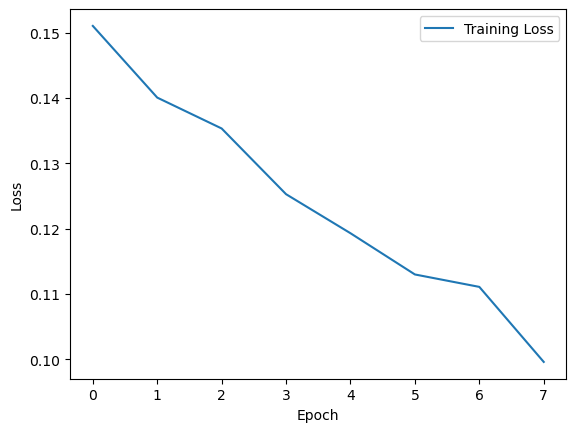

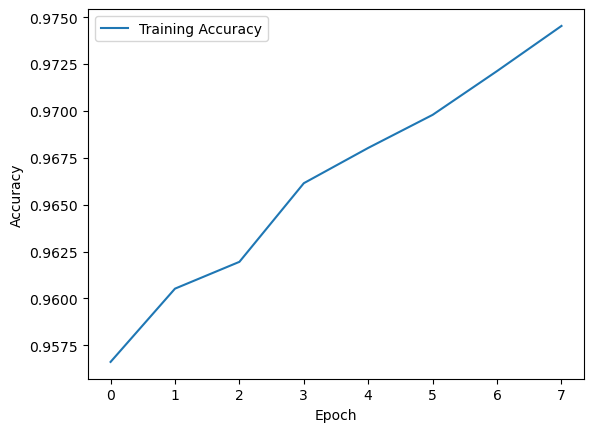

In [73]:
# Training Loss and Accuracy Visualization

import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here we can have overall interpretation:

- The training results suggest that the Convolutional Neural Network (CNN) model made significant advancements during the training process. Both the reduction in training loss and the increase in training accuracy indicate that the model effectively learned from the provided training data.

- However, it's essential to recognize that these results pertain specifically to the training dataset. To assess the model's generalization and real-world performance, it is crucial to conduct further evaluation on validation and test datasets. These results serve as a promising indication of the model's potential but should be followed by thorough evaluation to ensure its effectiveness in the ultrasound breast classification project.

- Continuing with evaluation, fine-tuning, and testing on unseen data will help determine the model's readiness for practical use in classifying ultrasound breast images.

---

# Enhancing CNN Model Architecture for Improved Image Classification

In this section, we define and configure Image Data Generators for training and validation data. Additionally, we apply data augmentation techniques to the training data to enhance the model's ability to generalize.
   

Here we configure TensorFlow to modify its optimization behavior. Specifically, we disable the "fused_conv2d" optimization option. So, this configuration change allows us to fine-tune TensorFlow's behavior to suit our project's requirements.

In [42]:
# TensorFlow Configuration

import tensorflow as tf
tf.config.optimizer.set_experimental_options({"fused_conv2d": False})


# Enhancing Image Data Generators for Improved Model Training

In this section, we introduce enhancements to the data preprocessing pipeline by utilizing advanced Image Data Generators. These enhancements aim to improve the quality and diversity of the training data, ultimately contributing to better model performance.

By comparing teh fist Image Data Generatign processing and the current one we can see several enhancments. Here are the breakdown of these modifications:

    - Batch Size: The batch size in the modified code has been reduced from 128 to 32. This change was made to accommodate hardware limitations and ensure smoother model training. Smaller batch sizes can be advantageous when working with limited resources.
    
    - Additional Data Augmentation: The modified code includes additional data augmentation techniques, such as shear_range and zoom_range. These augmentations introduce more diversity into the training data, potentially improving the model's ability to generalize to unseen examples.
    
    - Grayscale Images: The color_mode parameter has been set to 'grayscale' in both training and validation generators. This change ensures that the images are converted to grayscale (1 channel) before processing. Grayscale images can reduce the computational complexity of the model and help the model focus on relevant features.
    
    - Fill Mode: The fill_mode parameter has been set to 'nearest' in the data augmentation configuration. This setting determines how newly created pixels are filled when applying transformations. 'Nearest' fills the empty spaces with the nearest pixel value, maintaining image consistency.


In [43]:
# Data Augmentation and Image Data Generators

from keras.preprocessing.image import ImageDataGenerator

# Define paths to train and validation data directories

train_dir = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced'
validation_dir = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/val/balanced'

# Define image data generators for training and validation
batch_size = 32  

# Augmentation training data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 200),  
    batch_size=batch_size,
    color_mode='grayscale',  # Use grayscale images, the images are 3 channels, here we are turnnign them to 1 channel
    class_mode='categorical'  
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 200),  
    batch_size=batch_size,
    color_mode='grayscale',  # Use grayscale images, the images are 3 channels, here we are turnnign them to 1 channel
    class_mode='categorical'  
)


Found 41975 images belonging to 2 classes.
Found 4360 images belonging to 2 classes.


Now we have set up Image Data Generators with data augmentation for training data and standard scaling for validation data. These generators are crucial for efficiently handling and preprocessing image data, which is essential for training and evaluating Convolutional Neural Network (CNN) models. The data augmentation techniques applied to the training data help improve the model's robustness and generalization capabilities.

Furthermore, it's important to note the following statistics about the dataset:

- **Training Data**: We found a total of 41,975 images belonging to 2 classes in our training dataset. This dataset is a critical component for training our neural network.

- **Validation Data**: Similarly, our validation dataset consists of 4,360 images belonging to 2 classes. These images will be used to assess the model's performance on unseen data.

These numbers provide insights into the scale of our dataset and the distribution of classes, which is vital for understanding the characteristics of our image classification task. As we proceed with model training and evaluation, we will leverage these datasets to assess the model's accuracy, generalization, and overall performance on ultrasound breast images.

---

Here we can the enhancined version of CNN Model.But before that we can have compare the CNN model architectures between the original and modified code snippets to highlight the enhancements made in the modified code. The goal is to understand how these enhancements can potentially improve model performance. Here are the key features that adjusted and improve the original code: 

    - Convolutional Layers: The modified CNN model includes deeper convolutional layers (32, 64, 128 filters) compared to the original model (16, 32 filters). Deeper layers can capture more complex features.

    - Dropout: Dropout layers with a dropout rate of 0.5 are added in the modified model to prevent overfitting. The original model used a dropout rate of 0.1.

    - Early Stopping: The modified model incorporates early stopping with a patience of 3 to monitor validation loss and restore the best weights. This helps prevent overfitting and improves generalization.

    - Input Shape: The modified model explicitly specifies the input shape as (100, 200, 1) to match the preprocessed image dimensions.

    - Learning Rate: The modified model uses a smaller learning rate (0.0001) for the Adam optimizer, which can lead to more stable convergence.
    
These enhancements aim to create a more robust and accurate CNN model for ultrasound breast image classification.   

Now we can run this model; the enhanced architecture incorporates deeper convolutional layers, dropout for regularization, and early stopping to optimize model training. These improvements are expected to yield better image classification results compared to the original model.

In [44]:
# Enhanced CNN Model Architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


#Sequential model
CNN_model = Sequential()

# Convolutional layers
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 200, 1)))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))

# Flatten output and dense layers
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.5)) 
CNN_model.add(Dense(2, activation='softmax'))  

# Compile model
optimizer = Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = CNN_model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/20
1312/1312 [==============================] - 522s 397ms/step - loss: 0.4573 - accuracy: 0.7844 - val_loss: 0.2757 - val_accuracy: 0.9014
Epoch 2/20
1312/1312 [==============================] - 521s 397ms/step - loss: 0.2381 - accuracy: 0.9069 - val_loss: 0.3265 - val_accuracy: 0.8739
Epoch 3/20
1312/1312 [==============================] - 514s 391ms/step - loss: 0.1724 - accuracy: 0.9313 - val_loss: 0.2667 - val_accuracy: 0.8911
Epoch 4/20
1312/1312 [==============================] - 559s 426ms/step - loss: 0.1413 - accuracy: 0.9447 - val_loss: 0.1658 - val_accuracy: 0.9321
Epoch 5/20
1312/1312 [==============================] - 583s 444ms/step - loss: 0.1206 - accuracy: 0.9535 - val_loss: 0.1538 - val_accuracy: 0.9422
Epoch 6/20
1312/1312 [==============================] - 518s 395ms/step - loss: 0.1079 - accuracy: 0.9572 - val_loss: 0.1302 - val_accuracy: 0.9498
Epoch 7/20
1312/1312 [==============================] - 757s 577ms/step - loss: 0.0929 - accuracy: 0.9638 - val_

- These results suggest that the model is training well and improving in terms of both its ability to fit the training data and generalize to unseen data. However, it's essential to monitor these metrics further, especially on additional epochs, to assess if further training leads to even better performance or if the model starts overfitting. Here are the breakdown the results:

    - Loss: In each epoch, the loss decreased, which is a positive sign. Starting at 0.4573 in the first epoch and decreasing to 0.0695 in the 10th epoch suggests that the model improved significantly in terms of its task (likely a classification task).
    
    - Accuracy: The accuracy starts at 78.44% in the first epoch and gradually improves to 97.36% in the 10th epoch. This is a strong indicator that the model is learning and becoming better at its task over time.
    
    - Validation Loss and Validation Accuracy: The validation loss decreases from 0.2757 in the first epoch to 0.1195 in the 10th epoch, indicating that the model is also improving in terms of generalization. The validation accuracy follows a similar trend, improving from 90.14% to 96.56%. The fact that both training and validation metrics are improving suggests that the model is not overfitting (it's not just memorizing the training data).
    

In [45]:
# Save the entire model as a `.keras` zip archive.
CNN_model.save('CNN_model.keras')

---
**Loss and Accuracy Visualization**

In both plots show that the model is learning and improving its performance over the epochs. The consistent gap between training and validation metrics suggests good generalization, and the final accuracy and loss values indicate that the model has achieved a high level of accuracy and is effectively minimizing its loss on both the training and validation datasets. These are positive signs of a well-trained neural network.

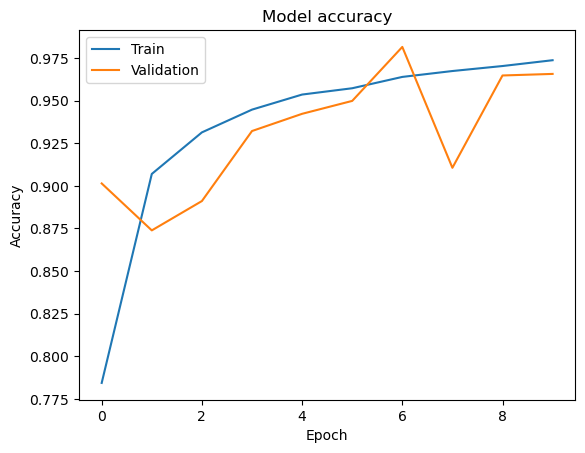

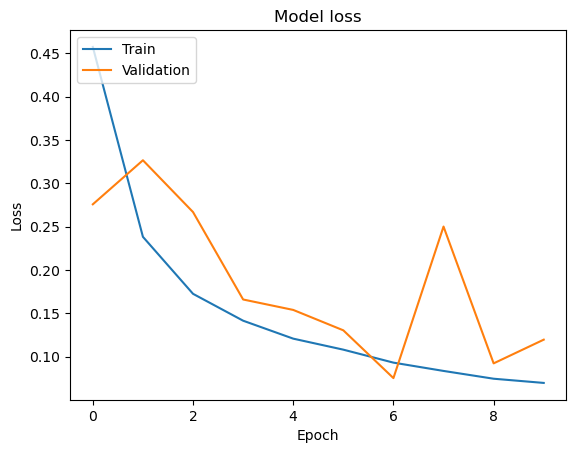

In [46]:
#Plot accuracy of train and validation 

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plot loss of train and validation 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix Visualization for Model Evaluation

Now we can generate and visualize a confusion matrix for evaluating the performance of a model. The confusion matrix helps you understand how well the model is classifying different classes. 

137/137 [==============================] - 22s 159ms/step


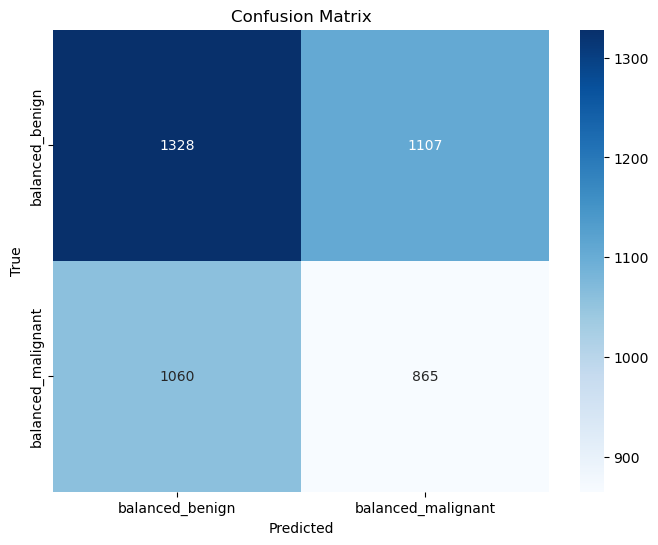

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predicted_probs = CNN_model.predict(validation_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)  
true_labels = validation_generator.classes

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Here are the analzye result of confusion matrix:


    - True Positives (TP): 1328 - These are instances where our model correctly predicted "benign" (Class 0) tumors as benign. It means our  model correctly identified 1328 cases of actual benign tumors.
    
    - True Negatives (TN): 865 - These are instances where our model correctly predicted "malignant" (Class 1) tumors as malignant. It means our model correctly identified 865 cases of actual malignant tumors.

    - False Positives (FP): 1060 - These are instances where our model incorrectly predicted "benign" (Class 0) tumors when they were actually "malignant" (Class 1). In other words, our model made a false prediction of benign when it should have been malignant.
    
    - False Negatives (FN): 1107 - These are instances where our model incorrectly predicted "malignant" (Class 1) tumors as benign. In other words, yoourur model made a false prediction of benign when it should have been malignant.
    

- Accuracy: (TP + TN) / (TP + TN + FP + FN) - Measures the overall correctness of our model's predictions, considering both "benign" and "malignant" cases.

        Accuracy = (1328 + 865) / (1328 + 865 + 1060 + 1107)
        Accuracy ≈ 0.5021 or 50.21%


- Precision: TP / (TP + FP) - Measures the accuracy of our model's positive predictions (benign tumors).

        Precision = 1328 / (1328 + 1060)
        Precision ≈ 0.5568 or 55.68%

- Recall (Sensitivity): TP / (TP + FN) - Measures our model's ability to identify all actual positive cases (benign tumors).

        Recall = 1328 / (1328 + 1107)
        Recall ≈ 0.5452 or 54.52%

- F1-Score: 2 * (Precision * Recall) / (Precision + Recall) - A balanced measure of our model's performance in terms of both false positives and false negatives for "benign" and "malignant" classes.

        F1-Score = 2 * (0.5568 * 0.5452) / (0.5568 + 0.5452)
        F1-Score ≈ 0.5509 or 55.09%
        
- The aim of the next step it would be improving the recall.


---
# Improved CNN Model for Binary Image Classification with Keras

In this stepwe present an enhanced CNN model and our goal is to imporve the recall. Here we are including L2 regularization, dropout layers, and early stopping, to enhance the model's generalization capability. It should be mentioned again that our primary focus is on improving recall, we also consider other performance metrics to ensure a well-balanced model.

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Create a sequential model
CNN_model = Sequential()

# Add convolutional layers
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 200, 1)))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  
CNN_model.add(Dropout(0.5))  
CNN_model.add(Dense(2, activation='softmax'))  

# Compile model
optimizer = Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = CNN_model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/20
1312/1312 [==============================] - 523s 398ms/step - loss: 0.6898 - accuracy: 0.7213 - val_loss: 0.5419 - val_accuracy: 0.7972
Epoch 2/20
1312/1312 [==============================] - 529s 403ms/step - loss: 0.4137 - accuracy: 0.8527 - val_loss: 0.3539 - val_accuracy: 0.8892
Epoch 3/20
1312/1312 [==============================] - 522s 398ms/step - loss: 0.3384 - accuracy: 0.8881 - val_loss: 0.3045 - val_accuracy: 0.9089
Epoch 4/20
1312/1312 [==============================] - 481s 366ms/step - loss: 0.2935 - accuracy: 0.9052 - val_loss: 0.3396 - val_accuracy: 0.8869
Epoch 5/20
1312/1312 [==============================] - 462s 352ms/step - loss: 0.2578 - accuracy: 0.9183 - val_loss: 0.2689 - val_accuracy: 0.9202
Epoch 6/20
1312/1312 [==============================] - 463s 353ms/step - loss: 0.2298 - accuracy: 0.9285 - val_loss: 0.2137 - val_accuracy: 0.9404
Epoch 7/20
1312/1312 [==============================] - 464s 354ms/step - loss: 0.2085 - accuracy: 0.9356 - val_

>The training loss consistently decreases with each epoch, which is a positive sign. This indicates that the model is learning from the training data.
The training accuracy steadily increases, suggesting that the model is becoming more accurate in its predictions on the training set.
The validation loss shows a decreasing trend, indicating that the model is performing well on unseen data (the validation set).
The validation accuracy is increasing over epochs, which is a good sign. It means that the model is generalizing well to new, unseen data.
The training and validation loss curves appear to be converging, which is a sign that the model is stabilizing and not overfitting.
The significant increase in validation accuracy from Epoch 4 to Epoch 5 suggests that the model made substantial improvements during this period.
Overall, these results indicate that our model is learning effectively and is performing well on both the training and validation data. The increasing validation accuracy and decreasing validation loss are positive signs.

In [50]:
# Save the entire model as a `.keras` zip archive.
CNN_model.save('CNN_model.keras')

---
**Loss and Accuracy Visualization**

Here we can see thet the convergence of loss curves and increasing accuracy curves demonstrate that our model is learning effectively and generalizing well to new data, which are positive signs of a well-trained machine learning model.

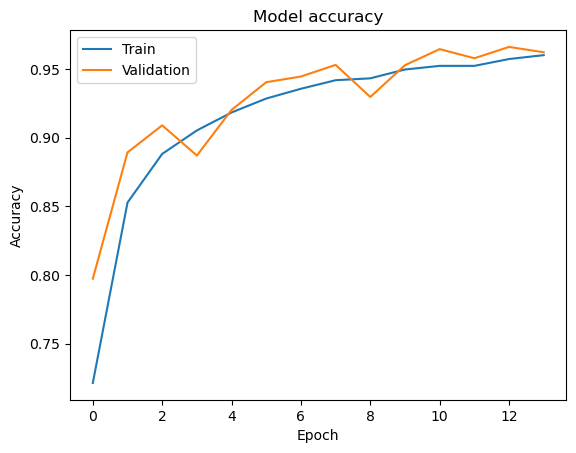

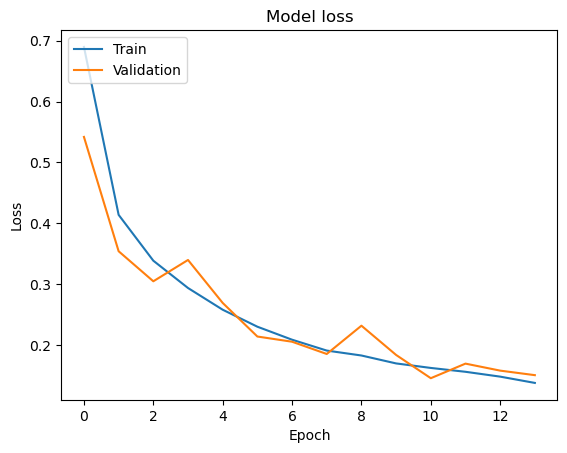

In [51]:
#Plot accuracy of train and validation 

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plot loss of train and validation 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix Visualization for Model Evaluation

Now we can generate and visualize a confusion matrix for evaluating the performance of the second tried model. 

137/137 [==============================] - 23s 166ms/step


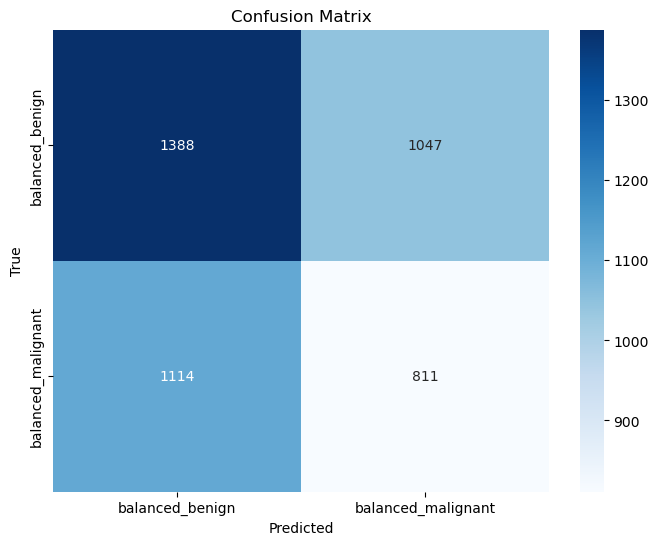

In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predicted_probs = CNN_model.predict(validation_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Convert probabilities to class labels
true_labels = validation_generator.classes

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TP (True Positives): 1388
TN (True Negatives): 811
FN (False Negatives): 1114
FP (False Positives): 1047

- Now, let's break down the analysis:

    - Accuracy: 
        
        Accuracy = (TP + TN) / (TP + TN + FP + FN)
        Accuracy = (1388 + 811) / (1388 + 811 + 1047 + 1114)
        Accuracy = 2199 / 4360 ≈ 0.504
    
    - Precision:

        Precision = TP / (TP + FP)
        Precision = 1388 / (1388 + 1047)
        Precision ≈ 0.570
        
    - Recall (Sensitivity): 
    
        Recall = TP / (TP + FN)
        Recall = 1388 / (1388 + 1114)
        Recall ≈ 0.555
        
    - Specificity: 
        
        Specificity = TN / (TN + FP)
        Specificity = 811 / (811 + 1047)
        Specificity ≈ 0.437

    - F1-Score: 
    
        F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
        F1-Score ≈ 2 * (0.570 * 0.555) / (0.570 + 0.555)
        F1-Score ≈ 0.562
----

**Calculating and Using Class Weights**

Here we calculate class weights based on the class distribution and use these class weight. This approach can be helpful when we are dealing with imbalanced datasets.

In [55]:
import numpy as np

# Calculate class weights based on the class distribution
class_weights = {
    0: len(train_generator.classes) / (2 * np.bincount(train_generator.classes)[0]),
    1: len(train_generator.classes) / (2 * np.bincount(train_generator.classes)[1])
}

# Use class_weights when fitting your model
history = CNN_model.fit(
    train_generator,
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping],
    class_weight=class_weights
)


Epoch 1/50
1312/1312 [==============================] - 704s 536ms/step - loss: 0.1510 - accuracy: 0.9566 - val_loss: 0.1856 - val_accuracy: 0.9507
Epoch 2/50
1312/1312 [==============================] - 731s 557ms/step - loss: 0.1401 - accuracy: 0.9605 - val_loss: 0.1699 - val_accuracy: 0.9580
Epoch 3/50
1312/1312 [==============================] - 728s 555ms/step - loss: 0.1353 - accuracy: 0.9620 - val_loss: 0.1477 - val_accuracy: 0.9642
Epoch 4/50
1312/1312 [==============================] - 722s 550ms/step - loss: 0.1253 - accuracy: 0.9661 - val_loss: 0.1358 - val_accuracy: 0.9743
Epoch 5/50
1312/1312 [==============================] - 711s 542ms/step - loss: 0.1193 - accuracy: 0.9680 - val_loss: 0.0710 - val_accuracy: 0.9915
Epoch 6/50
1312/1312 [==============================] - 732s 558ms/step - loss: 0.1130 - accuracy: 0.9698 - val_loss: 0.0889 - val_accuracy: 0.9876
Epoch 7/50
1312/1312 [==============================] - 723s 551ms/step - loss: 0.1111 - accuracy: 0.9721 - val_

>The model's training loss consistently decreases with each epoch, which is a positive sign. This indicates that the model is learning from the training data.
The training accuracy steadily increases, suggesting that the model is becoming more accurate in its predictions on the training set.
The validation loss shows a decreasing trend as well, which indicates that the model is also performing well on unseen data (the validation set).
The validation accuracy is high and improving, indicating that the model is generalizing well to new, unseen data.
Epoch 5 shows a significant drop in validation loss and a spike in validation accuracy. This could indicate a moment where the model made a significant improvement.
The training and validation loss curves appear to be converging, which is a sign that the model is stabilizing and not overfitting.
Overall, these results suggest that our model is learning effectively and performing well on both the training and validation data.

In [56]:
# Save the entire model as a `.keras` zip archive.
CNN_model.save('CNN_model.keras')

---
**Loss and Accuracy Visualization**


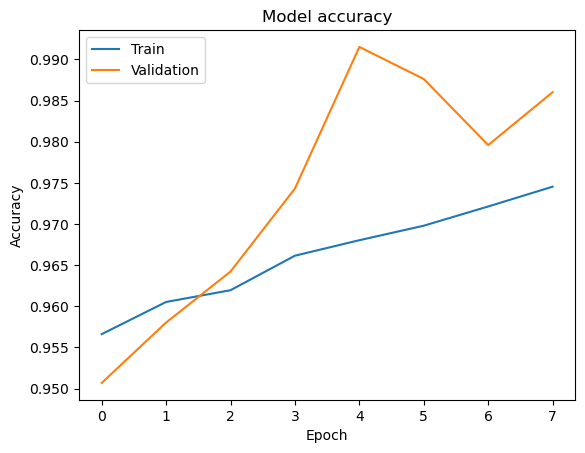

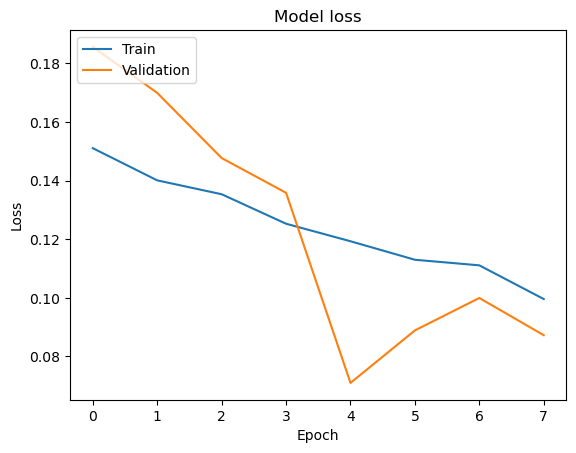

In [57]:
#Plot accuracy of train and validation 

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Plot loss of train and validation 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix Visualization for Model Evaluation
Now we can generate and visualize a confusion matrix for evaluating the performance of the third tried model.

137/137 [==============================] - 21s 152ms/step


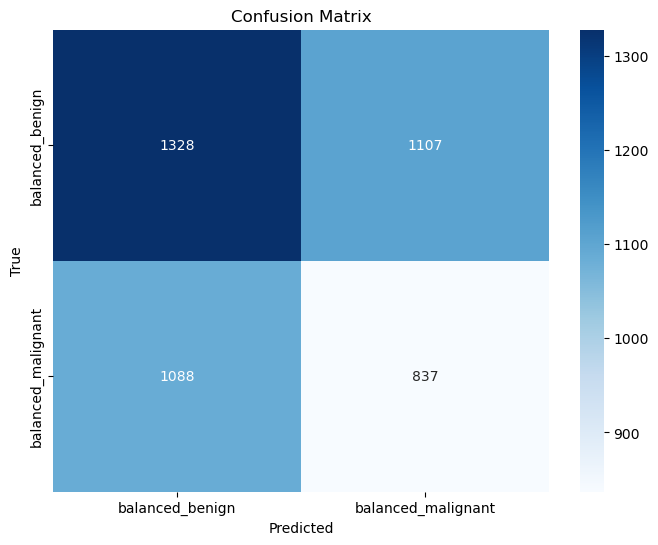

In [58]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predicted_probs = CNN_model.predict(validation_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Convert probabilities to class labels
true_labels = validation_generator.classes

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
class_names = list(validation_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

True Positives (TP): 1328
True Negatives (TN): 837
False Negatives (FN): 1088
False Positives (FP): 1107


- Now, let's break down the analysis:

    - Accuracy: 
        
        Accuracy = (TP + TN) / (TP + TN + FP + FN)
        Accuracy = (1328 + 837) / (1328 + 837 + 1107 + 1088)
        Accuracy ≈ 0.526
    
    - Precision:

        Precision = TP / (TP + FP)
        Precision = 1328 / (1328 + 1107)
        Precision ≈ 0.545
        
    - Recall (Sensitivity): 
    
        Recall = TP / (TP + FN)
        Recall = 1328 / (1328 + 1088)
        Recall ≈ 0.549
        
    - Specificity: 
        
        Specificity = TN / (TN + FP)
        Specificity = 837 / (837 + 1107)
        Specificity ≈ 0.430

    - F1-Score: 
    
        F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
        F1-Score = 2 * (0.545 * 0.549) / (0.545 + 0.549)
        F1-Score ≈ 0.547
----

# Making Predictions


Our model is trained and ready to go. Now we can take images and ask it to predict whether it is:
- Class 0: Benign
- Class 1: Malignant

As a proof of concept we'll just take an image from our training set and pass it through.

First we need to do image classification. The primary objective is to classify images into two classes: "benign" and "malignant" in the context of breast cancer ultrasound images. The function can be utilized to predict the class of a given image based on a pre-trained CNN model.


In [111]:
import os
import pathlib
import numpy as np
import tensorflow as tf
from PIL import Image

# Define class mapping dictionary
class_mapping = {
    'benign': 0,
    'malignant': 1,
}

# Function make predictions 
def predict_image_class(image_path):

    image_file = pathlib.Path(image_path)

    # Load and preprocess the test image
    test_image = Image.open(image_file)
    test_image = test_image.resize((200, 100))
    test_image = test_image.convert('L') 
    test_image = np.array(test_image) / 255.0  
    test_image = np.expand_dims(test_image, axis=0)

    # Make predictions using the CNN_model
    result = CNN_model.predict(test_image)

    # Interpret the prediction using the class mapping
    predicted_class_index = np.argmax(result, axis=1)
    predicted_class_name = [k for k, v in class_mapping.items() if v == predicted_class_index[0]]

    return predicted_class_name[0]


**Image Classification Prediction**


Now, we demonstrate how to use a pre-trained convolutional neural network (CNN) model to predict the class of a specific image.This could happen by using the `predict_image_class` function to classify an image based on a pre-trained CNN model. 


In [113]:
# Define path
image_path_1 = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/benign (1)-rotated2-rotated1.png"

# Predicting the class
predicted_class_1 = predict_image_class(image_path_1)
print("Predicted Class for Image 1:", predicted_class_1)

1/1 [==============================] - 0s 22ms/step
Predicted Class for Image 1: benign


>Based on the result it can say that we are having the successful application of our trained CNN model, which correctly classified the breast cancer ultrasound image as "benign" based on the evaluation of the true class.

In [115]:
# Define path
image_path_2 = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/flipped_malignant (1)-sharpened-rotated2.png'

# Predicting the class
predicted_class_2 = predict_image_class(image_path_2)
print("Predicted Class for Image 2:", predicted_class_2)

1/1 [==============================] - 0s 26ms/step
Predicted Class for Image 2: malignant


>Based on the result it can say that we are having the successful application of our trained CNN model, which correctly classified the breast cancer ultrasound image as "malignant" based on the evaluation of the true class.

# Explainable

Now we will analyze a prediction with the LIME method. We will start by importing the necessary libraries

In [100]:
import os,sys
try:
    import lime
except:
    !pip install lime
    import lime
from lime import lime_image
from keras.preprocessing import image
from skimage.segmentation import mark_boundaries

**Image Transformation**

Now we can transforms images into a suitable format for input to a deep learning model. The function is designed to process a list of image file paths, load the images, and prepare them for inference.
This step is essential for preparing input data for our deep learning model, ensuring that images are in the appropriate format and normalized for inference.


In [101]:
# Image Transformation Function

import numpy as np
from tensorflow.keras.preprocessing import image

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(100, 200), color_mode="grayscale")
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0  
        out.append(x)
    return np.vstack(out)


**Image Transformation and Array Shape Analysis**

Here we can demonstrate how the image transformation function processes an image file and provides insights into the shape of the resulting array.

In [264]:
from PIL import Image

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = Image.open(img_path).convert('L')  
        img = img.resize((200, 100)) 
        x = np.array(img)
        x = x.reshape((100, 200, 1))  
        out.append(x)
    return np.array(out)


In [265]:
images = transform_img_fn(['/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/benign (6).png'])
images.shape

(1, 100, 200, 1)

>The shape is reported as (1, 100, 200, 1), indicating a single image with dimensions 100x200 pixels and a single channel (grayscale).

**Image Visualization and Prediction**

Now, we can visualize a processed image and make predictions using a pre-trained deep learning model. 


1/1 [==============================] - 0s 110ms/step



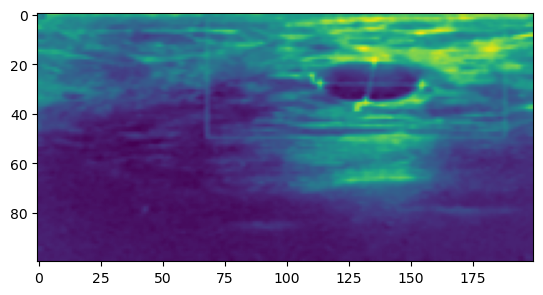

In [266]:
# Visualize the processed image
plt.imshow(np.array(images[0]))

# Make predictions
preds = np.array(tf.greater(CNN_model.predict(images), 0.5))

# Convert predictions to a boolean array
preds = preds.any(axis=1)  
print()

# LIME Image Explanation

Here we introduce the use of LIME (Local Interpretable Model-agnostic Explanations) to explain image predictions. Specifically, we create a LIME Image Explainer to provide interpretability to the predictions made by our deep learning model.

In [267]:
# Create a LIME Image Explainer

explainer = lime_image.LimeImageExplainer()

**Analyzing Processed Image Shape**

We examine the shape of the processed image obtained after transformation. Understanding the shape of the image array is essential for data preparation and model input.

In [268]:
# Analyze the shape of the processed image array

images[0].shape

(100, 200, 1)

>The processed image has dimensions of 100x200 pixels in grayscale with a single channel.

# Explaining Image Classifications with Lime and Felzenszwalb Segmentation

In the world of deep learning and computer vision, understanding why a neural network makes a particular decision is a challenging and crucial task. Here we demonstrate how to utilize Lime, a popular interpretability library, in conjunction with Felzenszwalb segmentation to explain image classifications generated by a convolutional neural network (CNN).

By using Lime's image explanation capabilities, this code offers insights into the key regions and features within an image that contribute most significantly to the CNN's predictions. The Felzenszwalb segmentation method helps break down the image into meaningful segments, aiding in the interpretability of the model's decisions.



In [295]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import felzenszwalb

# Function to process and explain an image
def process_and_explain_image(image_path):

    #Loading the CNN_model
    CNN_model = load_model('CNN_model.keras')

    # Load and resize the image
    resized_image = Image.open(image_path).resize((200, 100))  
    image_array = np.array(resized_image)

    
    if image_array.shape[-1] == 3:
        image_array = image_array.mean(axis=2)  

    # Reshaping
    image_array = image_array.reshape((1, 100, 200, 1))  

    # LimeImageExplainer
    explainer = LimeImageExplainer()

    # Lime with the 'felzenszwalb' 
    explanation = explainer.explain_instance(
        image_array[0],  
        CNN_model.predict,
        top_labels=1,
        hide_color=0,
        num_features=20,
        num_samples=500,
        segmentation_fn=lambda img: felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
    )
    
    return explanation

**Image Explanation Example1**

In this example, we'll demonstrate how to explain an image classification using Lime and Felzenszwalb segmentation. We'll provide an image and use the `process_and_explain_image` function to obtain an explanation.

In [300]:
explanation_image1 = process_and_explain_image('/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/benign (5)-rotated2-sharpened.png')


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 71ms/step


**Perturbing an Original Image Using a Mask**

In various image explanation techniques, it's often useful to perturb the original image to understand how specific regions impact a model's prediction. 

In [301]:
import numpy as np

def perturb_image(image, mask):
    if image.shape != mask.shape:
        # Resizing
        mask = np.resize(mask, image.shape)
    
    perturbed_image = image.copy()
    
    # Convert the mask to a boolean mask 
    boolean_mask = mask > 0
    
    
    perturbed_image[boolean_mask] = 0
    
    return perturbed_image

lime_mask = np.resize(lime_mask, original_image.shape)

perturbed_img = perturb_image(original_image, lime_mask)


# Visualizing Lime Explanation Mask

Visualizing the Lime explanation mask alongside the original image can provide valuable insights into which regions of the image contribute to a model's prediction. 


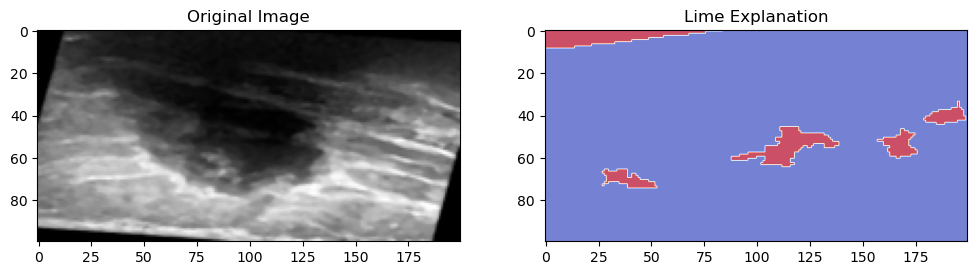

In [302]:
import matplotlib.pyplot as plt

# Visualize Lime explanation mask
explanation_image1 = explanation_image1.get_image_and_mask(
    label=explanation_image1.top_labels[0], positive_only=True, hide_rest=False
)

# Create a plot with the original image and the Lime explanation mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Original image
ax1.imshow(image_array[0].reshape(100, 200), cmap='gray')
ax1.set_title('Original Image')

# Lime explanation mask
ax2.imshow(explanation_image1[1], cmap='coolwarm', alpha=0.7)
ax2.set_title('Lime Explanation')

plt.show()

- To undrestand and interpret Lime's explanation involves understanding which regions of the ultrasound image were most influential in the model's prediction that the condition is benign. Here's some beakdowns of results:

- Original Ultrasound Image: The original ultrasound image is shown on the left side of the visualization. This is the actual ultrasound image of the benign breast condition that you provided for explanation.

- Lime Explanation Mask: The Lime explanation mask is shown on the right side of the visualization. It uses a color map to indicate the importance of different regions in the ultrasound image for the model's prediction.
        
- Warmer Colors (e.g., Red): These regions are the most important for the model's prediction that the condition is benign. They contribute positively to the predicted class. In the context of a medical ultrasound image, warmer colors may highlight areas that are indicative of benign characteristics or features.
             
- Cooler Colors (e.g., Blue): These regions are less important or may even negatively contribute to the prediction of benignity. In a medical ultrasound image, cooler colors may indicate areas that are not relevant to the benign condition or may even be misleading for the model.
            
- Opacity: The level of opacity (alpha) in the mask indicates the strength of importance. Highly opaque regions are more influential in supporting the prediction of benignity, while less opaque regions have a weaker influence.(alpha=0.7)
        

---

**Visualizing Lime Explanation Overlay with Measurements**

Here we visualize a Lime explanation as a transparent layer overlaid on the original grayscale image. Additionally, we calculate and annotate measurements for specific regions within the explanation mask. This approach helps us gain a deeper understanding of the impact of different regions on the model's prediction.


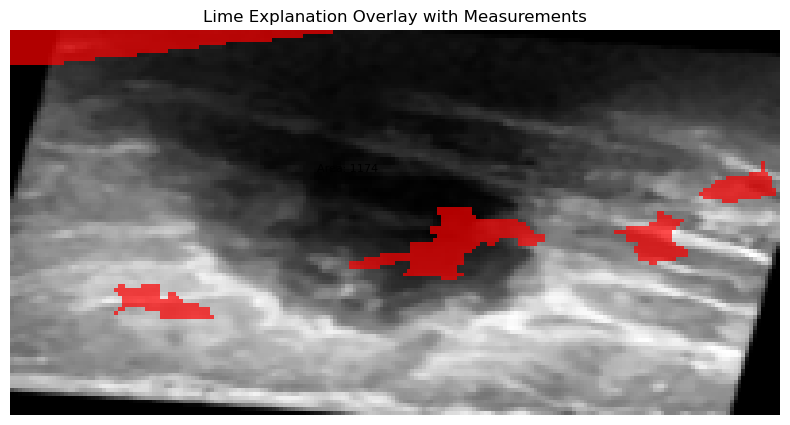

In [303]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from skimage.measure import regionprops

# Define a custom colormap 
colors = [(1, 0, 0, 0), (1, 0, 0, 1)]  
cmap = LinearSegmentedColormap.from_list('lime_cmap', colors)

# Visualize Lime explanation as a transparent layer 
fig, ax = plt.subplots(figsize=(10, 5))

# Original image
original_image = image_array[0].reshape(100, 200)
ax.imshow(original_image, cmap='gray')

# Lime explanation 
lime_mask = explanation_image1[1]
ax.imshow(lime_mask, cmap=cmap, interpolation='none', alpha=0.7)

# Annotate measurements
for region in regionprops(lime_mask.astype(int)):
    y, x = region.centroid
    area = region.area
    ax.annotate(f"Area: {area}", (x, y), color='black', fontsize=8, ha='center', va='center')

ax.set_title('Lime Explanation Overlay with Measurements')
plt.axis('off')
plt.show()

It should be mentioned that after running the code : The number "1174" represents the area (in pixels or some unit of measurement) of a particular region within the Lime explanation mask. This area value indicates the size or extent of that region in the context of the image.

---
#  Explain Another Ultrasound Image

In this example, we will use the `process_and_explain_image` function to explain a different ultrasound image. The provided image is of a potentially malignant breast condition.

In [316]:
explanation_image2 = process_and_explain_image('/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/flipped_malignant (24)-rotated1-sharpened.png')


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 [==============================] - 0s 55ms/step


In [ ]:
import numpy as np

def perturb_image(image, mask):
    if image.shape != mask.shape:
        
        # Resizing
        mask = np.resize(mask, image.shape)
    
    perturbed_image = image.copy()
    
    # Convert the mask to a boolean mask
    boolean_mask = mask > 0
    
    perturbed_image[boolean_mask] = 0
    
    return perturbed_image

lime_mask = np.resize(lime_mask, original_image.shape)

perturbed_img = perturb_image(original_image, lime_mask)

**Visualizing Lime Explanation Mask and Perturbing Image**

In this code example, we visualize a Lime explanation mask alongside the original ultrasound image for "image2.png." Additionally, we perturb the original image based on the explanation mask, highlighting regions of importance.


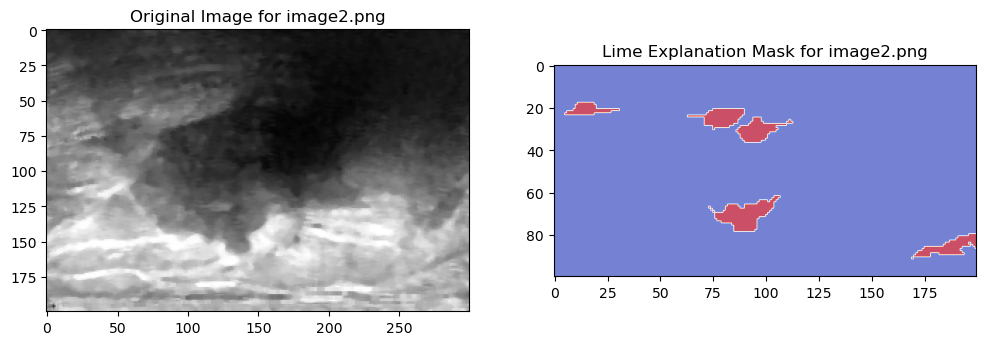

In [332]:
import matplotlib.pyplot as plt
import numpy as np  


# Create a figure with the original image and the Lime explanation mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Display the original image for image2.png
original_image_path = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/flipped_malignant (24)-rotated1-sharpened.png'
original_image = Image.open(original_image_path)
ax1.imshow(original_image)
ax1.set_title('Original Image for image2.png')

# Lime explanation mask for image2.png
lime_mask = explanation_image2.get_image_and_mask(
    explanation_image2.top_labels[0], positive_only=True, hide_rest=False)[1]
ax2.imshow(lime_mask, cmap='coolwarm', alpha=0.7)
ax2.set_title('Lime Explanation Mask for image2.png')

def perturb_image(image, mask):
    if image.shape != mask.shape:
       
    # Resizing
        mask = np.resize(mask, image.shape)

    perturbed_image = image.copy()

    # Convert the mask to a boolean mask 
    boolean_mask = mask > 0

    # Set important regions to zero 
    perturbed_image[boolean_mask] = 0

    return perturbed_image

# Ensuring dimensions
lime_mask = np.resize(lime_mask, original_image.size[::-1])  

perturbed_image = perturb_image(np.array(original_image), lime_mask)

plt.show()


- To undrestand and interpret Lime's explanation involves understanding which regions of the ultrasound image were most influential in the model's prediction that the condition is malignant. Here's some beakdowns of results:

- Original Ultrasound Image (Left):
    The left side of the visualization displays the original ultrasound image for "image2.png." This is the unaltered image that we are analyzing.

- Lime Explanation Mask (Right):
    The right side of the visualization shows the Lime explanation mask for "image2.png." This mask highlights regions within the image that had the most influence on the model's prediction, specifically regarding whether the breast condition is potentially malignant.

- Color Mapping: The colors in the explanation mask range from cool to warm, with cool colors (e.g., blue) representing areas that had a lesser influence on the model's decision, and warm colors (e.g., red) indicating areas that strongly contributed to the model's prediction.


---
# Conclusion 

In conclusion, this project aims to use machine learning to classify cases as benign or malignant. Assumptions regarding data quality, model complexity, and generalization potential were made. The project emphasizes interpretability through LIME explanations, providing insights into which image regions influence predictions. The final results and conclusions will shed light on the model's performance and its potential value in improving breast cancer diagnosis and treatment decisions.